In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
#individuals
n = 50
#loci
m = 100


#here every matrix entree has to be zero or one, with having a f_i probability to get selected

#G = np.random.choice([0, 1], size=(n,m), p=[f_zero, f_i])

#frequency of alleles, random uniform distribution between 0 and 1, with m samples
f_M = np.random.uniform(0,1,m)
#initialize G matrix
G = np.zeros((n, m));

# choose random SNP
loci =random.randint(0,m-1)
#frequency of that loci from our uniform distribution
f_i = f_M[loci]
#select SNP
SNP = G[:,loci]
#will be used to flip a coin based on f_i
def loci_frequency_flip(f_i):
    return random.random() < f_i

for k in range(0, len(SNP)):
    if(loci_frequency_flip(f_i)):
        SNP[k] = 1
    
#Random Array of Zeros and Ones, no frequency
#G = np.random.choice([0, 1], size=(n,m))
print(SNP)

[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1.]


In [3]:
from math import sqrt
import random

# mean and standard deviation
H=0

#third interpretation, this assumes that we are making a Y_j for every individual and 
#in each loop we choose a random variant for that person
def Simulate_Phenotype_PerPerson(SNP,var_e,var_g):
    #rows are the loci so each person has a row of different loci
    individuals = len(SNP)
    #where columns are the individuals
    mean = 0 
    #because we are given variance and python random.normal only accepts std, we need to convert variance to std
    sigma_e = sqrt(var_e)
    sigma_b = sqrt(var_g)
    #b_i = loci effect on phenotype
    b_i = np.random.normal(0, sigma_b)
    Y_n = np.zeros((individuals, 1));
    for k in range(0, individuals):
        #each individual will have a random e_j value
        e_j = np.random.normal(0, sigma_e)
        #G_ij will be the jth individual from our SNP for the loci of choce
        G_ij  = SNP[k]
        Y_j = b_i*G_ij + e_j
        Y_n[k] = Y_j 
    H= var_g/(var_g+var_e)
    return Y_n,H



In [4]:
Y,H = Simulate_Phenotype_PerPerson(SNP,.1,.1)

In [5]:
#third function assumes that for each person j in M we make a phenotype Y_j
print('Phenotypes for loci '+str(loci)+' are '+str(Y))

Phenotypes for loci 16 are [[ 0.24788936]
 [-0.04842468]
 [ 0.34165186]
 [-0.19087957]
 [-0.07397595]
 [ 0.04890424]
 [ 0.46148309]
 [ 0.66719266]
 [ 0.82206678]
 [ 0.26895893]
 [-0.34604499]
 [-0.08823366]
 [ 0.3140577 ]
 [-0.32139498]
 [-0.3083751 ]
 [ 0.65282344]
 [ 0.47921147]
 [ 0.40400036]
 [ 0.2787865 ]
 [ 0.25847665]
 [ 0.34827602]
 [ 0.05562069]
 [ 0.31704751]
 [ 0.41261379]
 [-0.01547405]
 [ 0.41098799]
 [ 0.90640899]
 [ 0.70695615]
 [-0.15682674]
 [ 0.52029742]
 [-0.28136197]
 [ 0.56116518]
 [-0.09528195]
 [-0.12808685]
 [ 0.88227108]
 [ 0.17426931]
 [ 1.06490359]
 [ 0.25844242]
 [ 0.0202651 ]
 [-0.15643734]
 [ 0.48696903]
 [ 0.40531941]
 [ 0.82976934]
 [ 0.36215034]
 [ 0.95969411]
 [ 0.15015827]
 [-0.08837257]
 [ 0.83352516]
 [ 0.608235  ]
 [ 0.42919591]]


In [6]:
# append Y predictions to G matrix
G = np.append(G, Y, axis=1)

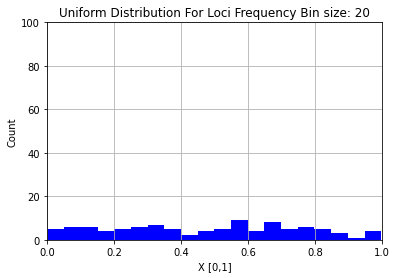

In [7]:
#use this to see distribution og f_i frequency
import matplotlib.pyplot as plt
bin_size = 20
count, bins, ignored = plt.hist(f_M, 20, facecolor='blue') 

plt.xlabel('X [0,1]')
plt.ylabel('Count')
plt.title("Uniform Distribution For Loci Frequency Bin size: "+str(bin_size))
plt.axis([0, 1, 0, 100]) # x_start, x_end, y_start, y_end
plt.grid(True)

plt.show(block = False)